### The Data
We can begin by loading in our training data into data frames:

In [54]:
df.train <- read.csv('titanic_train.csv')

In [55]:
head(df.train)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [56]:
class(df.train)

[1] "data.frame"

In [57]:
str(df.train)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


### Exploratory Data Analysis (EDA)

In [58]:
sapply(df.train, function(x) sum(is.na(x)))

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

In [59]:
df.train <- lapply(df.train, function(x) {
  type.convert(as.character(x), na.strings = "")
})

In [60]:
df.train <- as.data.frame(df.train)

In [61]:
class(df.train)

[1] "data.frame"

In [62]:
sapply(df.train, function(x) sum(is.na(x)))

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0         687           2

### Data Visualization with ggplot2

In [63]:
library(ggplot2)

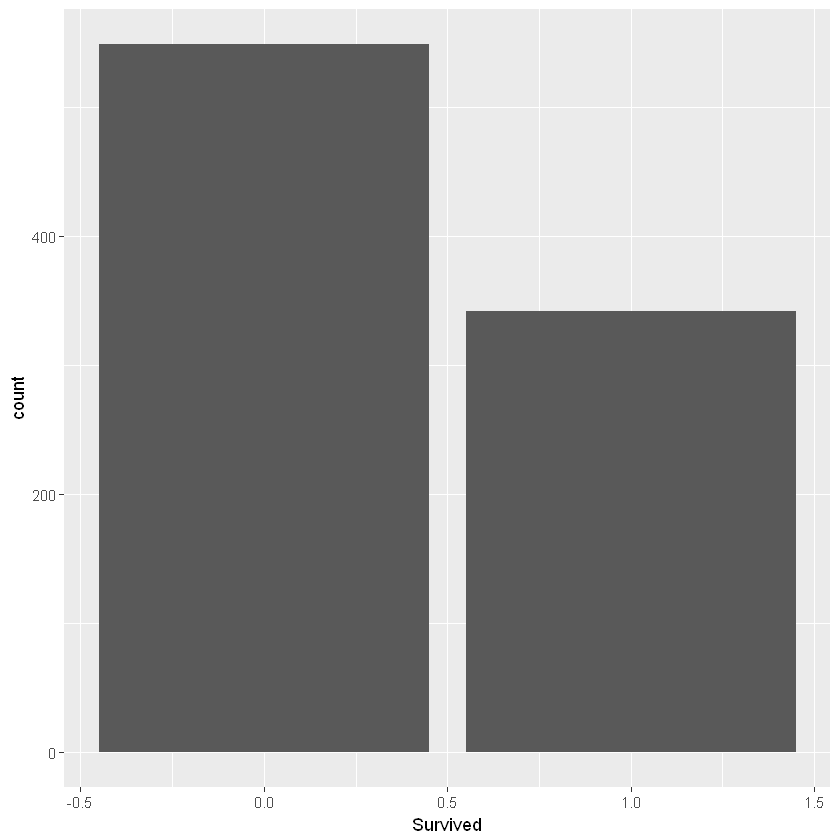

In [64]:
ggplot(df.train,aes(Survived)) + geom_bar()

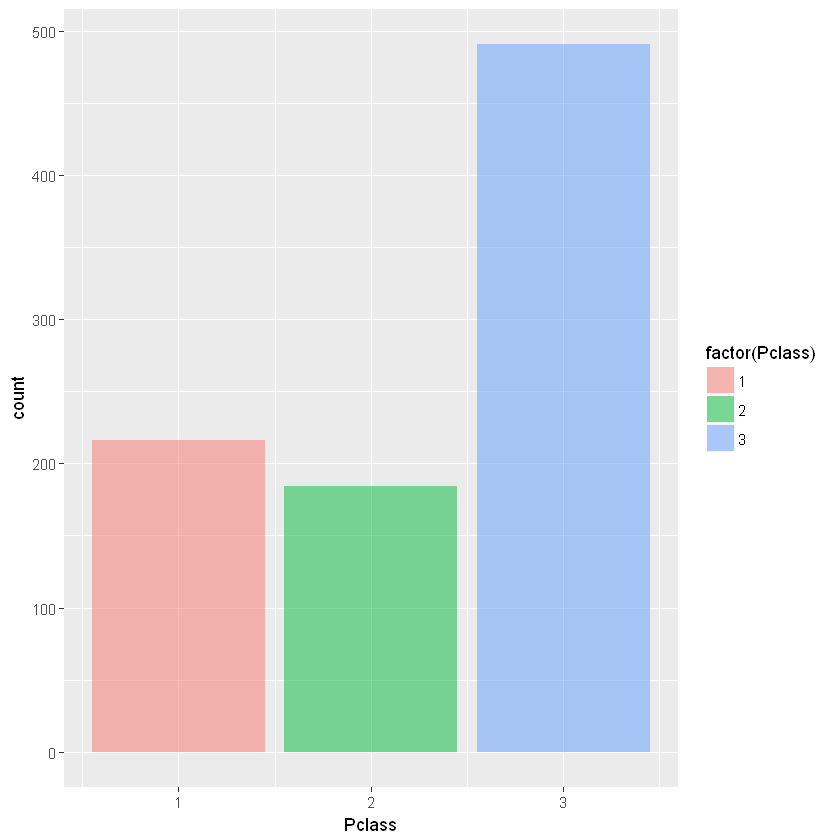

In [65]:
ggplot(df.train,aes(Pclass)) + geom_bar(aes(fill=factor(Pclass)),alpha=0.5)

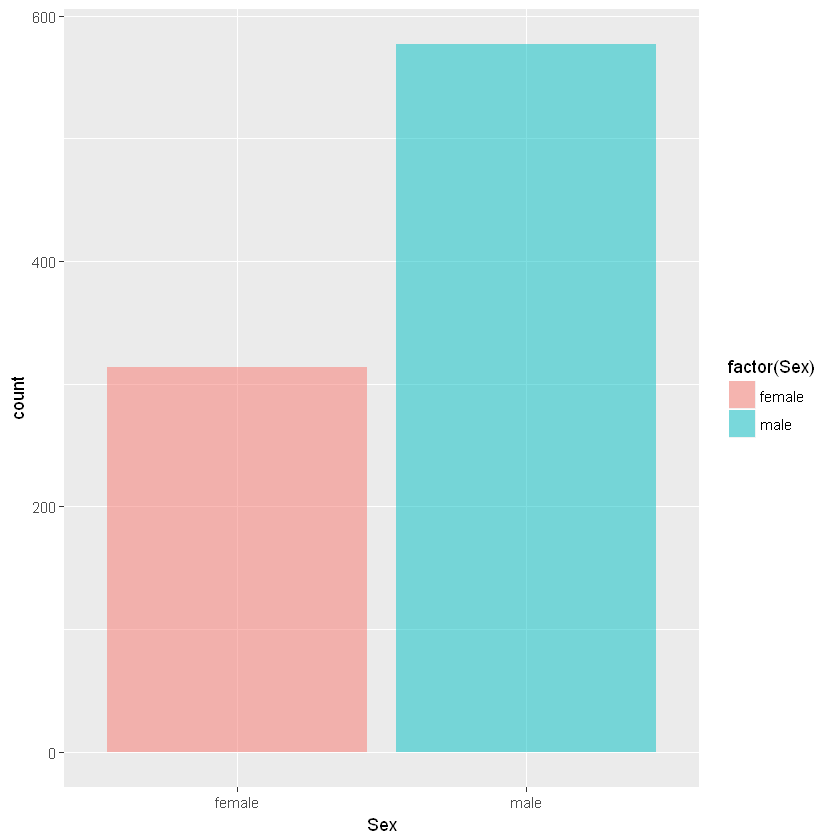

In [66]:
ggplot(df.train,aes(Sex)) + geom_bar(aes(fill=factor(Sex)),alpha=0.5)

Warning message:
"Removed 177 rows containing non-finite values (stat_bin)."

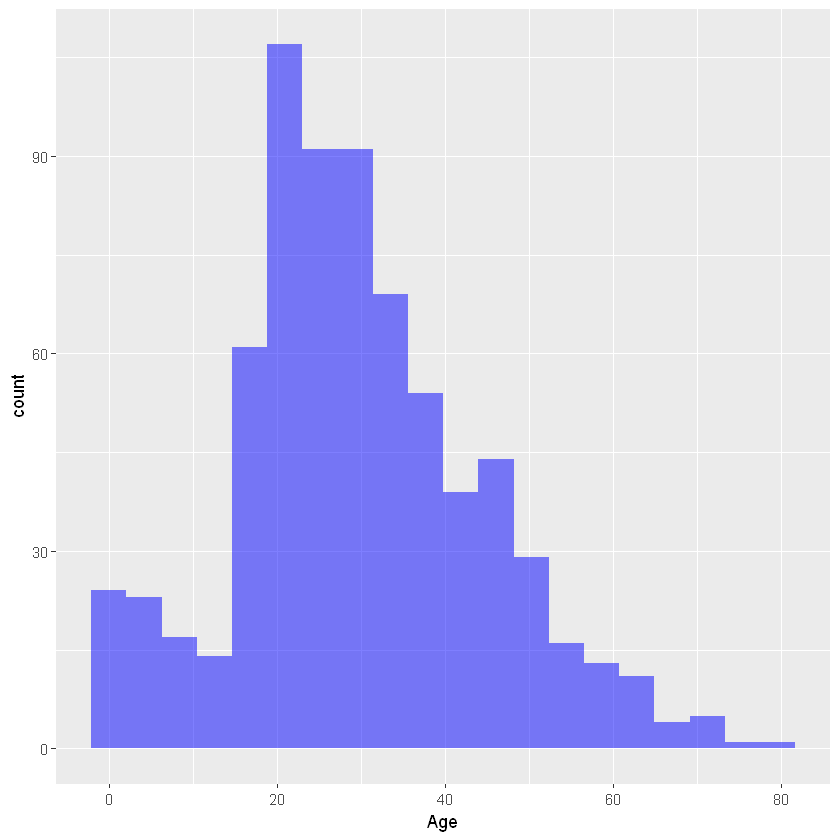

In [67]:
ggplot(df.train,aes(Age)) + geom_histogram(fill='blue',bins=20,alpha=0.5)

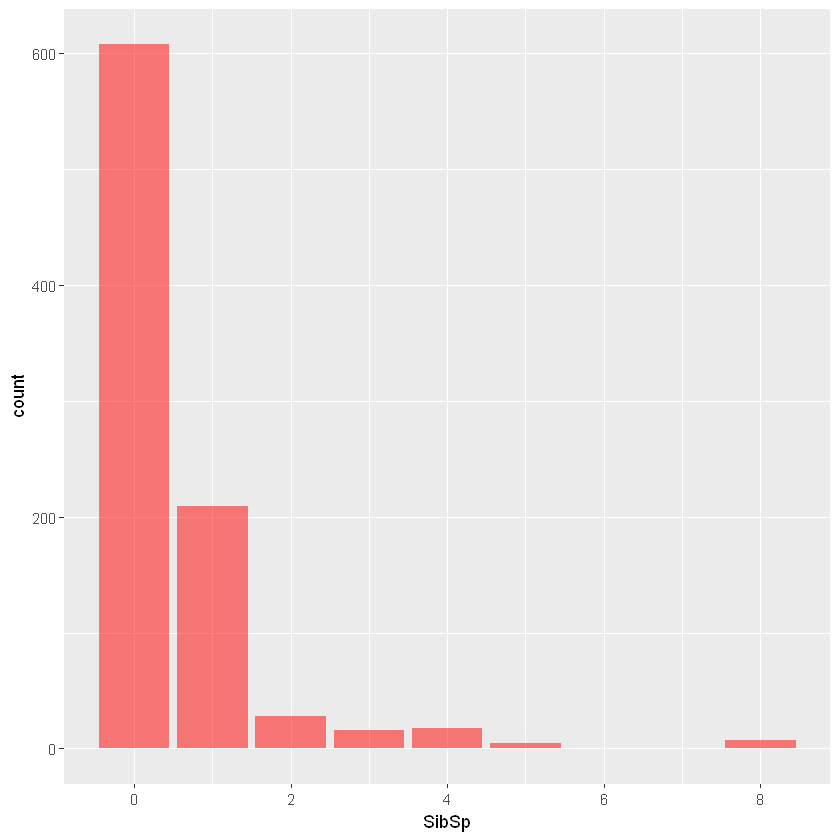

In [68]:
ggplot(df.train,aes(SibSp)) + geom_bar(fill='red',alpha=0.5)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


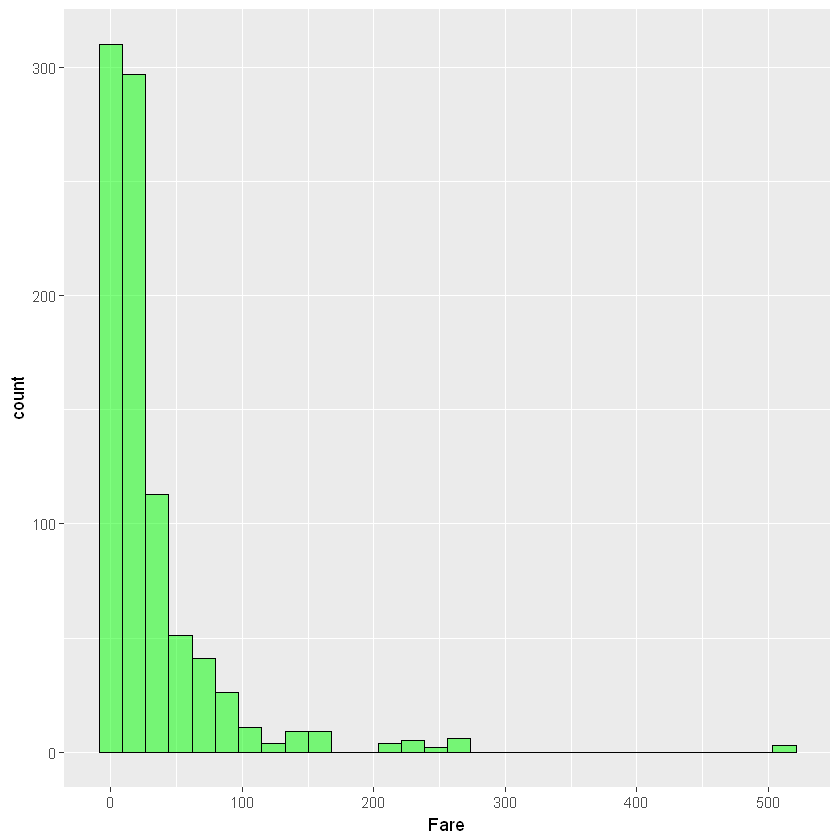

In [69]:
ggplot(df.train,aes(Fare)) + geom_histogram(fill='green',color='black',alpha=0.5)

### Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).

Warning message:
"Removed 177 rows containing non-finite values (stat_boxplot)."

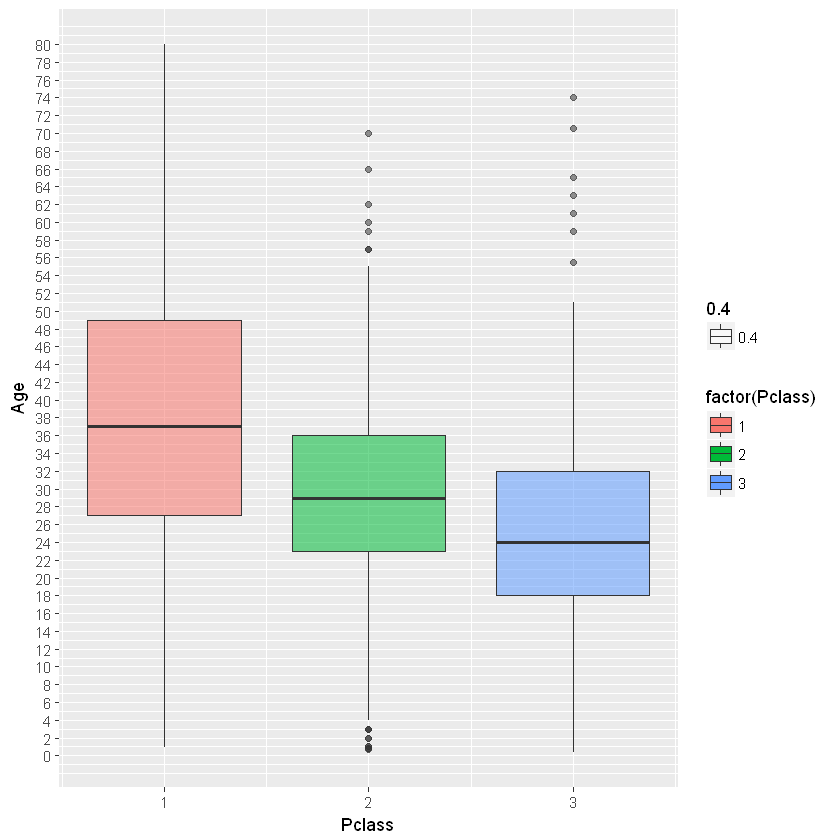

In [70]:
pl <- ggplot(df.train,aes(Pclass,Age)) + geom_boxplot(aes(group=Pclass,fill=factor(Pclass),alpha=0.4)) 
pl + scale_y_continuous(breaks = seq(min(0), max(80), by = 2))

In [71]:
impute_age <- function(age,class){
    out <- age
    for (i in 1:length(age)){
        
        if (is.na(age[i])){

            if (class[i] == 1){
                out[i] <- 37

            }else if (class[i] == 2){
                out[i] <- 29

            }else{
                out[i] <- 24
            }
        }else{
            out[i]<-age[i]
        }
    }
    return(out)
}

In [72]:
fixed.ages <- impute_age(df.train$Age,df.train$Pclass)

In [73]:
df.train$Age <- fixed.ages

In [74]:
sapply(df.train, function(x) sum(is.na(x)))

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0           0 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0         687           2

#### Drop Variables based on values 

In [75]:
head(df.train)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,24,0,0,330877,8.4583,NA,Q


In [78]:
df.train <- subset(df.train, select = -c(PassengerId,Cabin,Name,Ticket))

In [79]:
head(df.train)

Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22,1,0,7.2500,S
1,1,female,38,1,0,71.2833,C
1,3,female,26,0,0,7.9250,S
1,1,female,35,1,0,53.1000,S
0,3,male,35,0,0,8.0500,S
0,3,male,24,0,0,8.4583,Q


In [80]:
df.train <- na.omit(df.train )

In [81]:
sapply(df.train, function(x) sum(is.na(x)))

Survived   Pclass      Sex      Age    SibSp    Parch     Fare Embarked 
       0        0        0        0        0        0        0        0

Now let's set factor columns.

In [82]:
str(df.train)

'data.frame':	889 obs. of  8 variables:
 $ Survived: int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass  : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  22 38 26 35 35 24 54 2 27 14 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 3 levels "C","Q","S": 3 1 3 3 3 2 3 3 3 1 ...
 - attr(*, "na.action")=Class 'omit'  Named int [1:2] 62 830
  .. ..- attr(*, "names")= chr [1:2] "62" "830"


In [83]:
df.train$Survived <- factor(df.train$Survived)
df.train$Pclass <- factor(df.train$Pclass)
df.train$Parch <- factor(df.train$Parch)
df.train$SibSp <- factor(df.train$SibSp)

### Train the Model

In [84]:
log.model <- glm(formula=Survived ~ . , family = binomial(link='logit'),data = df.train)

In [85]:
summary(log.model)


Call:
glm(formula = Survived ~ ., family = binomial(link = "logit"), 
    data = df.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8158  -0.6139  -0.4206   0.5809   2.4896  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.872e+00  5.184e-01   7.470 8.01e-14 ***
Pclass2     -1.079e+00  3.092e-01  -3.490 0.000484 ***
Pclass3     -2.191e+00  3.161e-01  -6.930 4.20e-12 ***
Sexmale     -2.677e+00  2.040e-01 -13.123  < 2e-16 ***
Age         -3.971e-02  8.758e-03  -4.534 5.79e-06 ***
SibSp1       8.135e-02  2.245e-01   0.362 0.717133    
SibSp2      -2.897e-01  5.368e-01  -0.540 0.589361    
SibSp3      -2.241e+00  7.202e-01  -3.111 0.001862 ** 
SibSp4      -1.675e+00  7.620e-01  -2.198 0.027954 *  
SibSp5      -1.595e+01  9.588e+02  -0.017 0.986731    
SibSp8      -1.607e+01  7.578e+02  -0.021 0.983077    
Parch1       3.741e-01  2.895e-01   1.292 0.196213    
Parch2       3.862e-02  3.824e-01   0.101 0.919560    
Parch3   

### Predicting using Test Cases

In [86]:
library(caTools)
set.seed(101)

split = sample.split(df.train$Survived, SplitRatio = 0.70)

final.train = subset(df.train, split == TRUE)
final.test = subset(df.train, split == FALSE)

Now let's rerun our model on only our final training set:

In [87]:
final.log.model <- glm(formula=Survived ~ . , family = binomial(link='logit'),data = final.train)

In [89]:
summary(final.log.model)


Call:
glm(formula = Survived ~ ., family = binomial(link = "logit"), 
    data = final.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9089  -0.5434  -0.3998   0.6080   2.5405  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.919e+00  6.311e-01   6.210 5.31e-10 ***
Pclass2     -1.069e+00  3.843e-01  -2.781  0.00542 ** 
Pclass3     -2.151e+00  3.922e-01  -5.484 4.15e-08 ***
Sexmale     -2.687e+00  2.494e-01 -10.776  < 2e-16 ***
Age         -4.102e-02  1.061e-02  -3.867  0.00011 ***
SibSp1       6.489e-02  2.766e-01   0.235  0.81454    
SibSp2      -1.406e-01  6.242e-01  -0.225  0.82184    
SibSp3      -3.104e+00  1.086e+00  -2.859  0.00425 ** 
SibSp4      -1.124e+00  8.448e-01  -1.331  0.18317    
SibSp5      -1.603e+01  9.597e+02  -0.017  0.98668    
SibSp8      -1.633e+01  1.005e+03  -0.016  0.98704    
Parch1       6.656e-01  3.611e-01   1.843  0.06526 .  
Parch2       1.186e-01  4.554e-01   0.260  0.79454    
Parch3

### Evaluating the result

In [90]:
fitted.probabilities <- predict(final.log.model,newdata=final.test,type='response')

In [91]:
fitted.results <- ifelse(fitted.probabilities > 0.5,1,0)

In [92]:
misClasificError <- mean(fitted.results != final.test$Survived)
print(paste('Accuracy',1-misClasificError))

[1] "Accuracy 0.790262172284644"


In [95]:
table(final.test$Survived, fitted.probabilities > 0.5)

   
    FALSE TRUE
  0   140   25
  1    31   71

In [ ]:
#install.packages('pROC',repos = 'http://cran.us.r-project.org')
#install.packages('ROCR',repos = 'http://cran.us.r-project.org')

In [98]:
library(ROCR)

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [99]:
pred <- prediction(fitted.results, final.test$Survived)

In [100]:
perf <- performance(pred, measure = "tpr", x.measure = "fpr") 

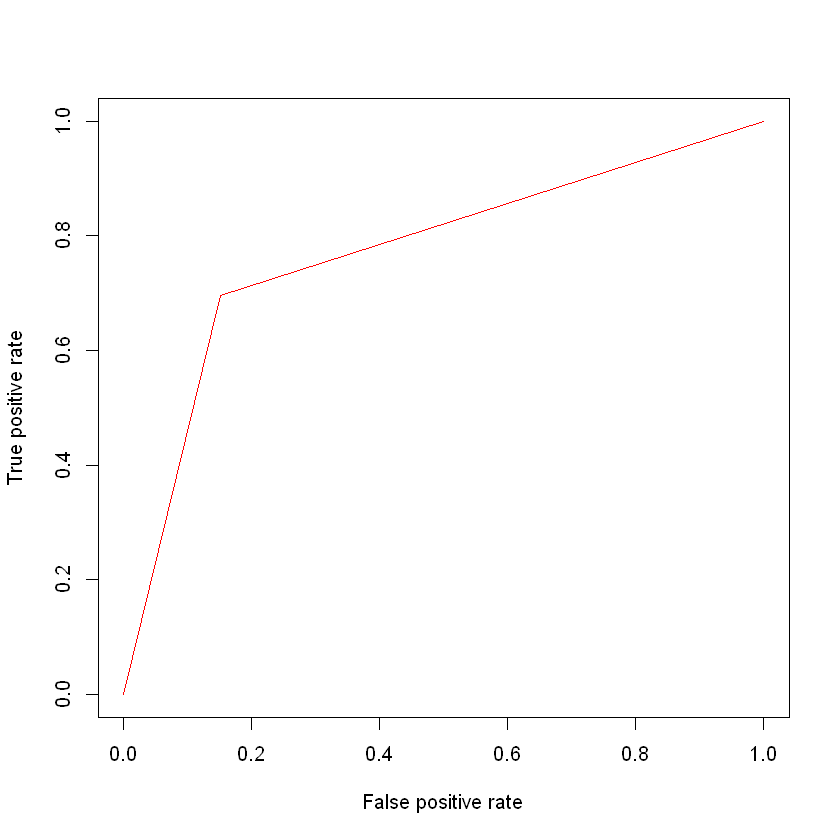

In [101]:
plot(perf, col=rainbow(10))

In [102]:
library(pROC)
roc_obj <- roc(final.test$Survived,fitted.results)
auc(roc_obj)

Area under the curve: 0.7723

In [103]:
lift <- function(depvar, predcol, groups=10) {
if(!require(dplyr)){
  install.packages("dplyr")
library(dplyr)}
if(is.factor(depvar)) depvar <- as.integer(as.character(depvar))
if(is.factor(predcol)) predcol <- as.integer(as.character(predcol))
helper = data.frame(cbind(depvar, predcol))
helper[,"bucket"] = ntile(-helper[,"predcol"], groups)
gaintable = helper %>% group_by(bucket)  %>%
  summarise_at(vars(depvar), funs(total = n(),totalresp=sum(., na.rm = TRUE))) %>%
  mutate(Cumresp = cumsum(totalresp),Gain=Cumresp/sum(totalresp)*100,Cumlift=Gain/(bucket*(100/groups)))
return(gaintable)
}

In [104]:
dt = lift(final.test$Survived,fitted.results, groups = 10)

Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [105]:
dt

bucket,total,totalresp,Cumresp,Gain,Cumlift
1,27,18,18,17.64706,1.764706
2,27,24,42,41.17647,2.058824
3,27,19,61,59.80392,1.993464
4,26,13,74,72.54902,1.813725
5,27,5,79,77.45098,1.549020
6,27,4,83,81.37255,1.356209
7,26,4,87,85.29412,1.218487
8,27,7,94,92.15686,1.151961
9,27,3,97,95.09804,1.056645
10,26,5,102,100.00000,1.000000


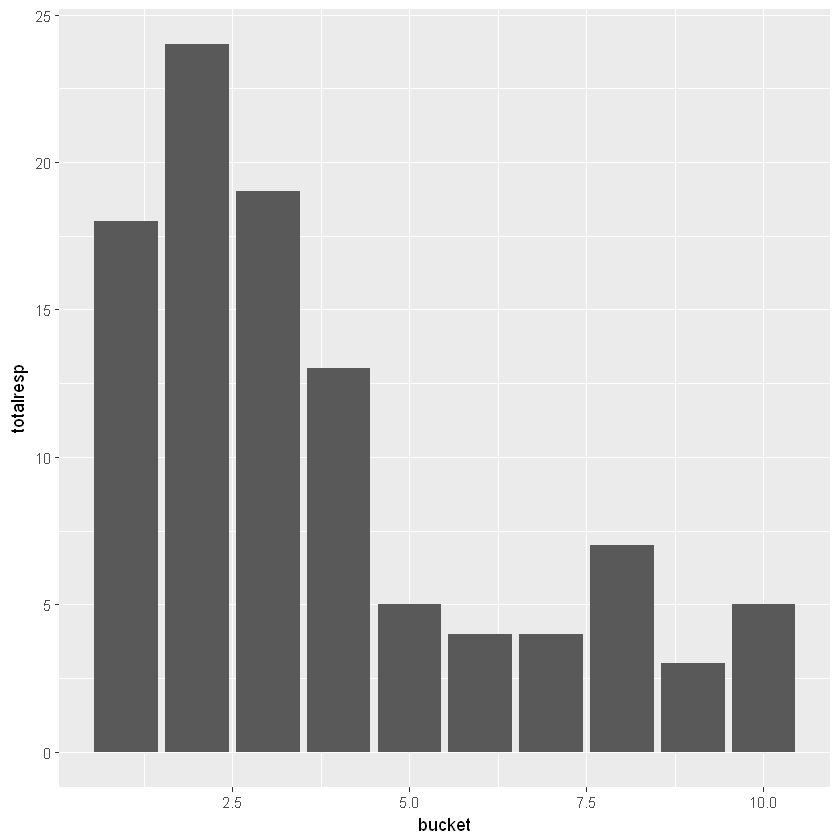

In [109]:
ggplot(dt, aes(bucket, totalresp)) +
  geom_bar(stat="summary", fun.y="sum")

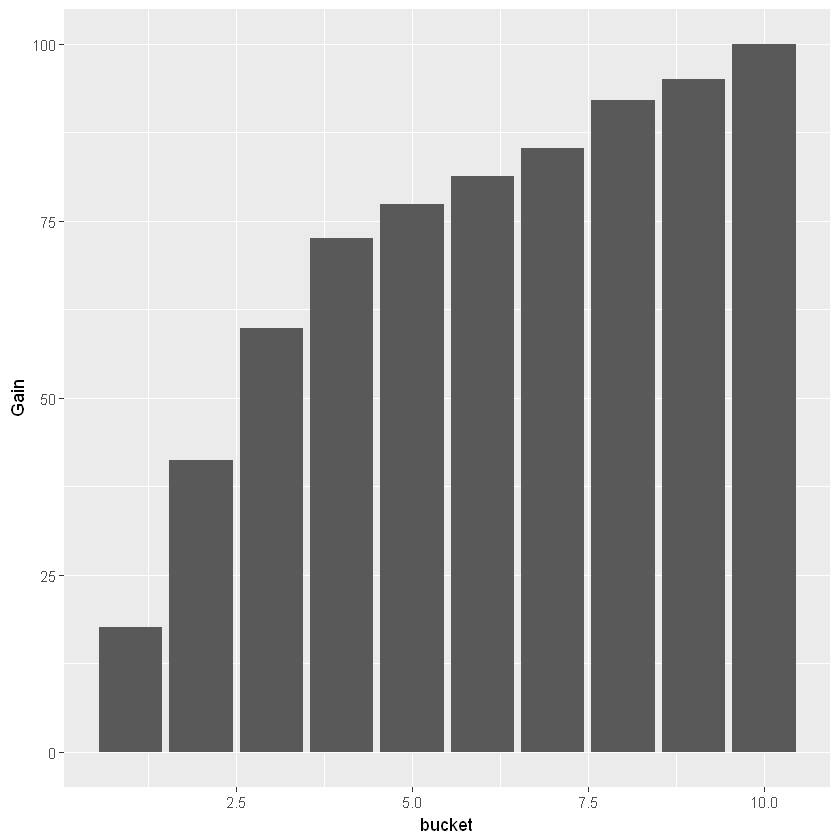

In [110]:
ggplot(dt, aes(bucket, Gain)) +
  geom_bar(stat="summary", fun.y="sum")